## Import Necesaary Libraries

In [1]:
## For analysis and numerical functions
import numpy as np
import pandas as pd

## For Visualization and EDA
import seaborn as sns
import matplotlib.pyplot as plt

## Extra
import warnings
warnings.filterwarnings(action="ignore")

## Dataset Loading

In [6]:
from sklearn.datasets import load_boston
boston=load_boston()
data=pd.DataFrame(boston.data)
data.columns=boston.feature_names
data["Price"]=boston.target

In [7]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data Sanity Checks

In [9]:
data.shape

(506, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Missing Value Check

In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## EDA

In [12]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
cont_cols=["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT"]
cat_cols=["CHAS","RAD"]
tartget=["Price"]

### Univariate Analysis

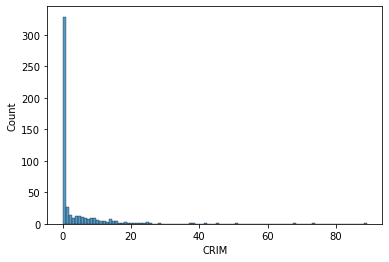

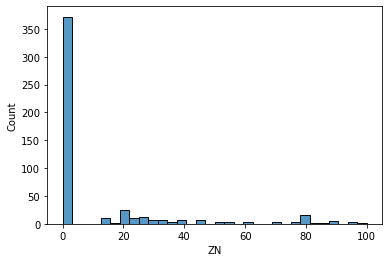

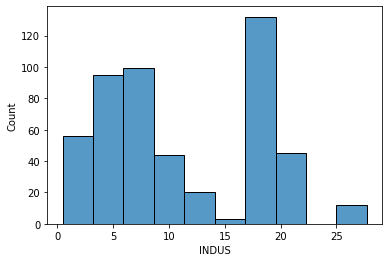

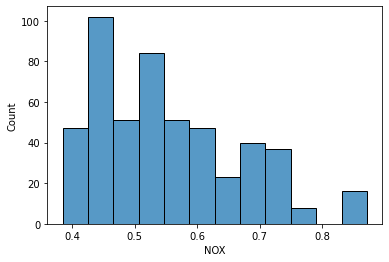

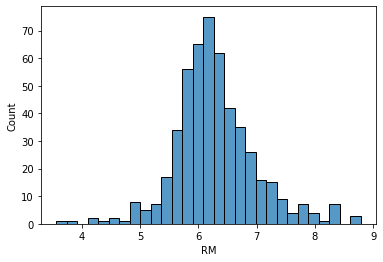

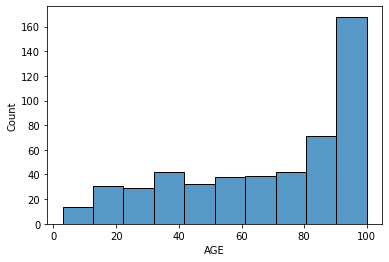

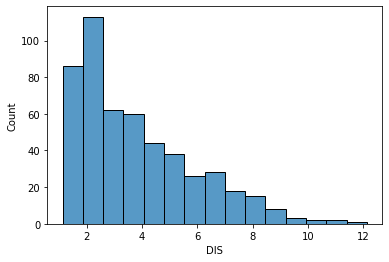

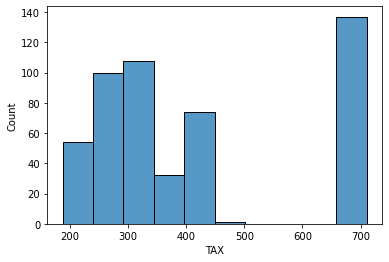

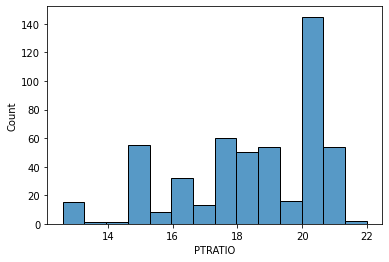

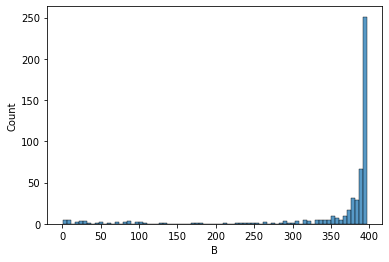

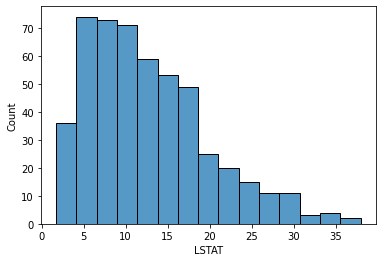

In [15]:
for i in cont_cols:
    sns.histplot(data[i])
    plt.show()

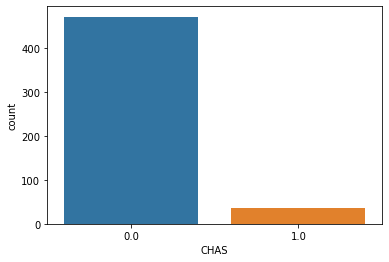

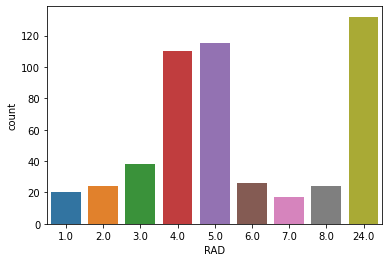

In [17]:
for i in cat_cols:
    sns.countplot(data[i])
    plt.show()

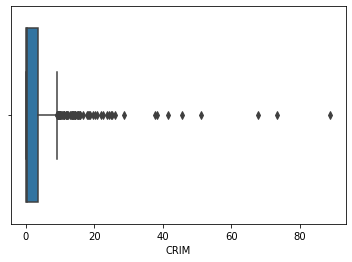

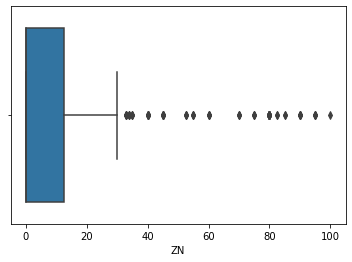

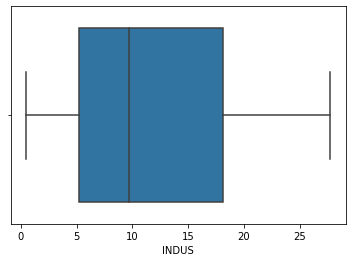

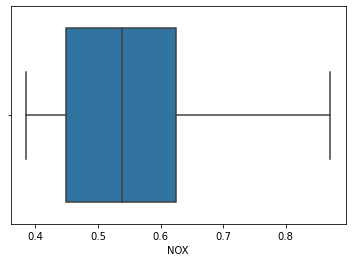

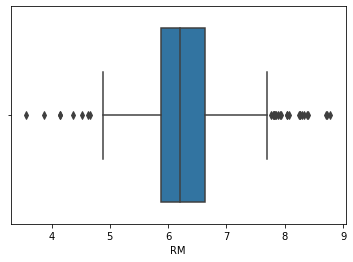

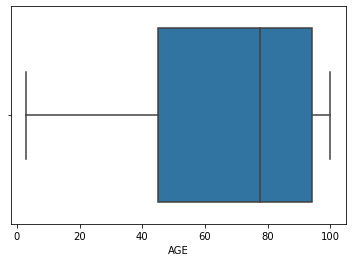

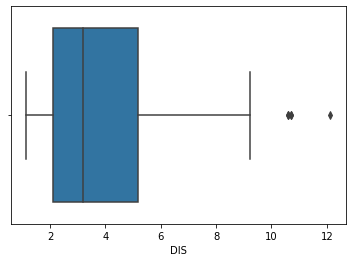

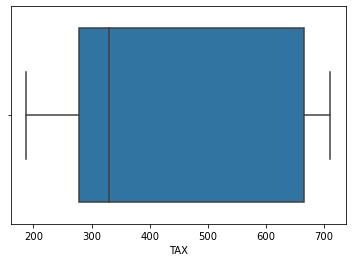

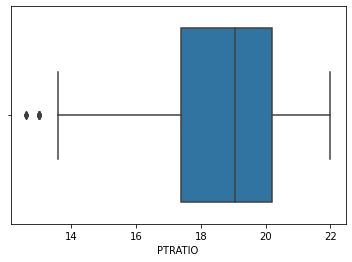

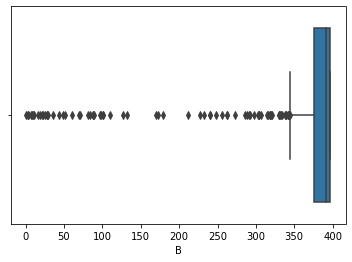

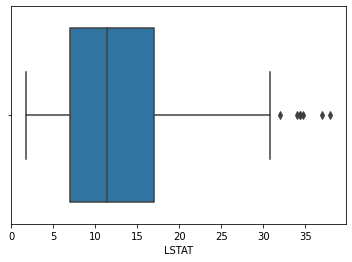

In [18]:
for i in cont_cols:
    sns.boxplot(data[i])
    plt.show()

### Bivariate Analysis

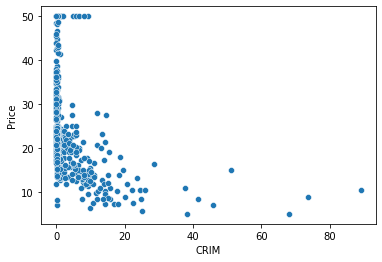

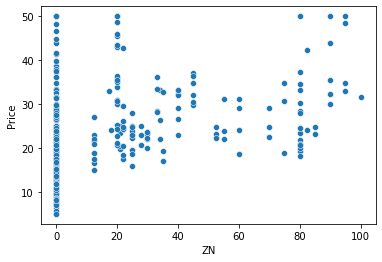

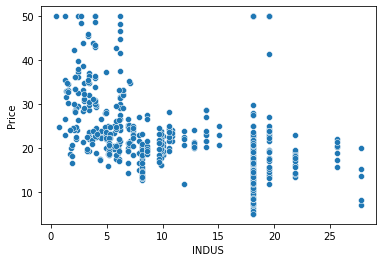

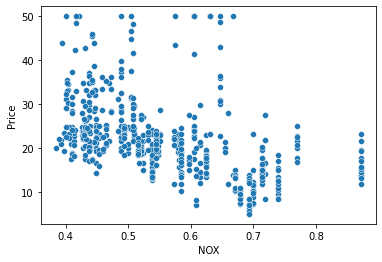

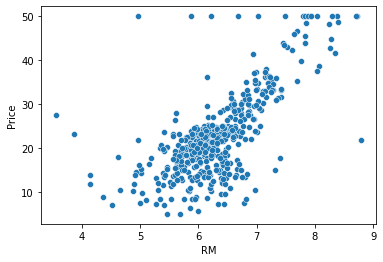

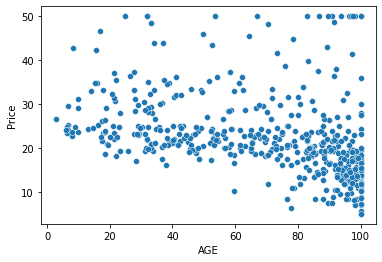

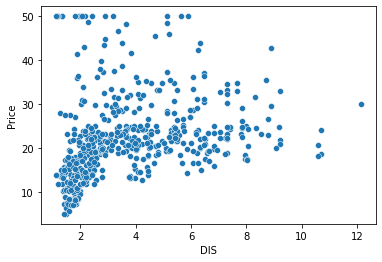

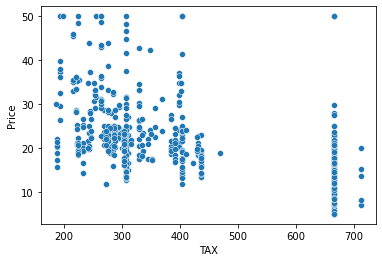

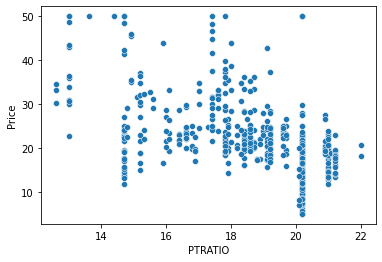

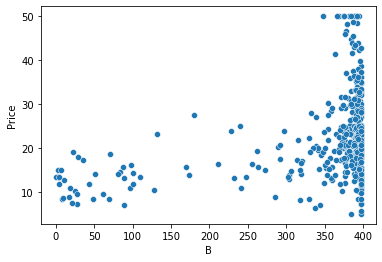

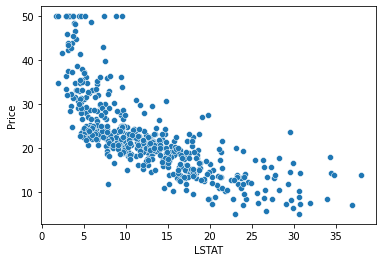

In [19]:
for i in cont_cols:
    sns.scatterplot(x=data[i],y=data["Price"])
    plt.show()

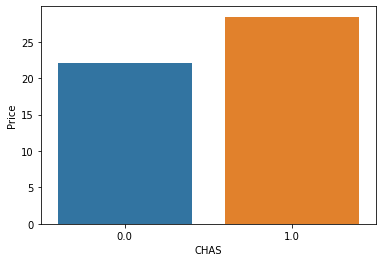

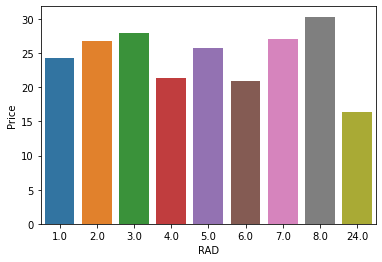

In [21]:
for i in cat_cols:
    sns.barplot(x=data[i],y=data["Price"],ci=None)
    plt.show()

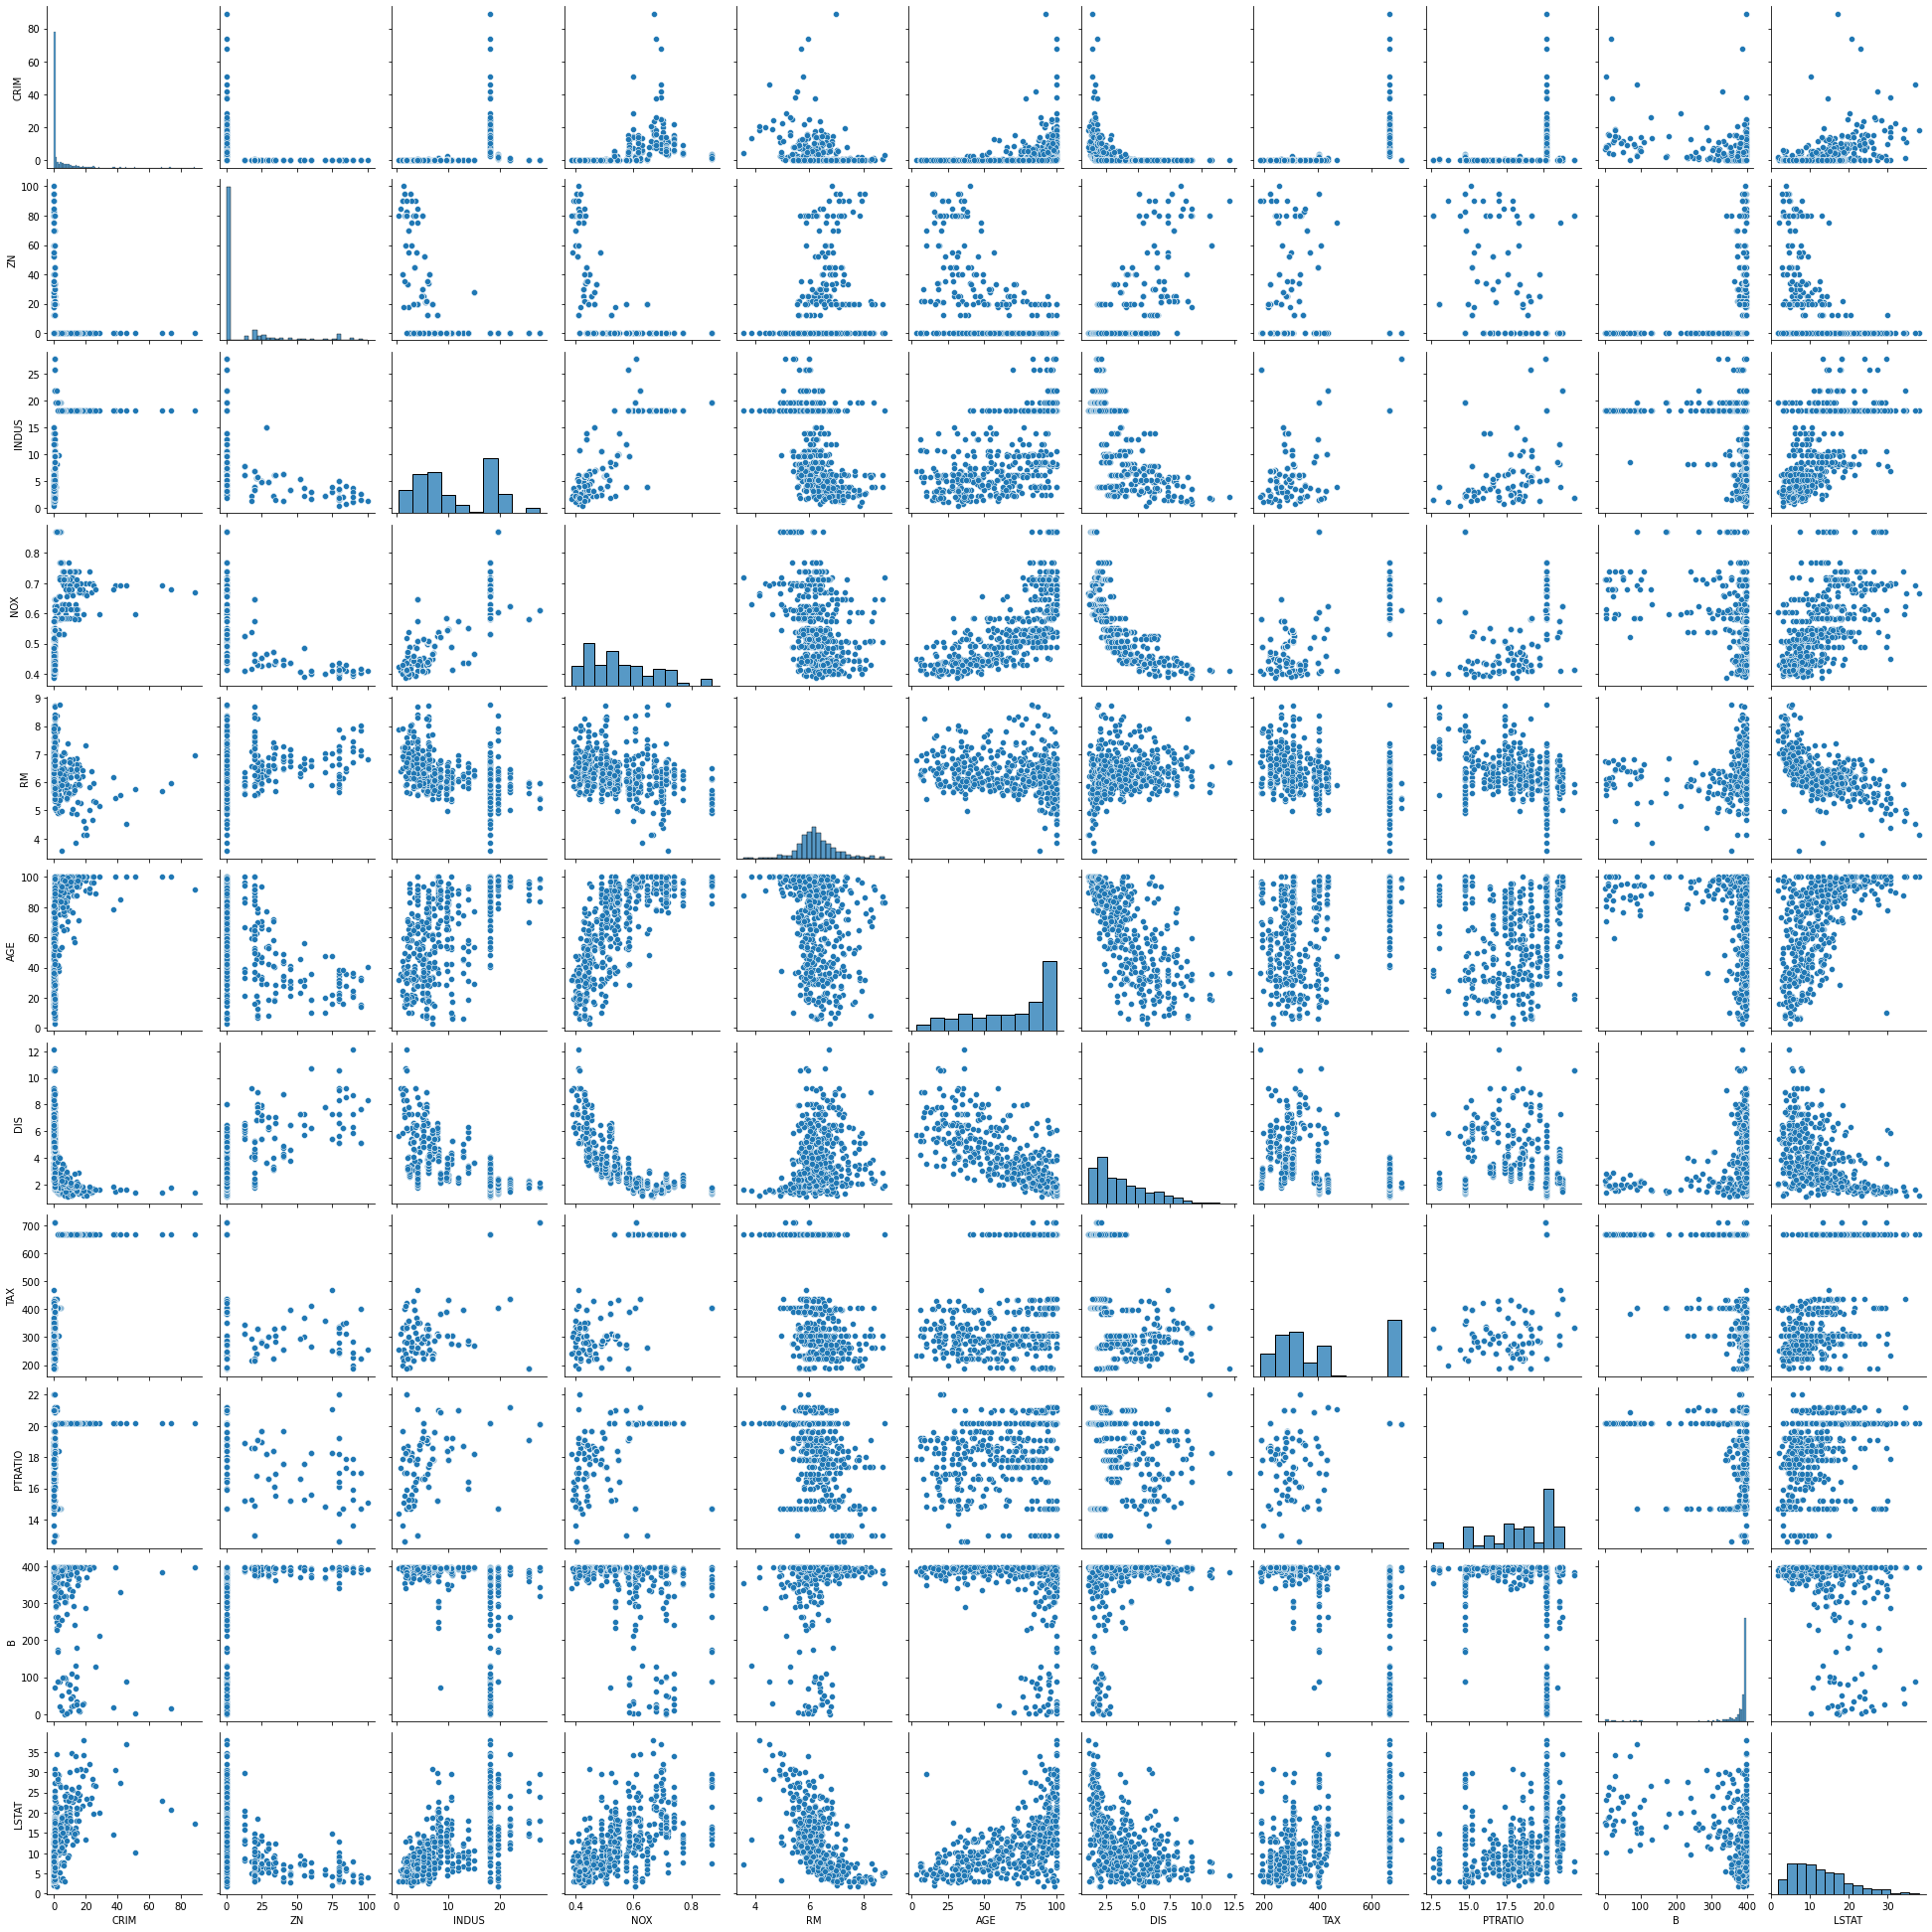

In [22]:
sns.pairplot(data[cont_cols])

## Heatmap

<AxesSubplot:>

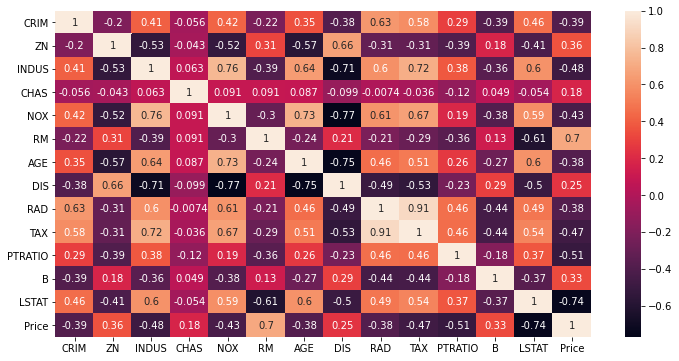

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

## Preprocessing Steps

In [25]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [26]:
cat_cols

['CHAS', 'RAD']

In [33]:
data["RAD"].nunique()

9

In [27]:
dum=pd.get_dummies(data["RAD"],drop_first=True)

In [29]:
dum.head()

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [30]:
data=pd.concat([data,dum],axis=1)

In [31]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,Price,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,9.14,21.6,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,4.03,34.7,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,2.94,33.4,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,5.33,36.2,0,1,0,0,0,0,0,0


In [35]:
data=data.drop(["RAD"],axis=1)

In [36]:
data.shape

(506, 21)

In [37]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,Price,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,21.6,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,34.7,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,33.4,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,36.2,0,1,0,0,0,0,0,0


## Modelling

In [38]:
X=data.drop(["Price"],axis=1)
y=data["Price"]

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=100)

In [40]:
## Scaling (Standard Scaling)

xtrain=(xtrain-xtrain.mean())/xtrain.std()

In [41]:
xtrain.shape

(404, 20)

In [42]:
## Feature Selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=10)
selector=selector.fit(xtrain,ytrain)
selector.support_


array([False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True])

In [44]:
xtrain.columns

Index([   'CRIM',      'ZN',   'INDUS',    'CHAS',     'NOX',      'RM',
           'AGE',     'DIS',     'TAX', 'PTRATIO',       'B',   'LSTAT',
             2.0,       3.0,       4.0,       5.0,       6.0,       7.0,
             8.0,      24.0],
      dtype='object')

In [45]:
selected_cols=["ZN","CHAS","NOX","RM","DIS","TAX",'PTRATIO', 'B','LSTAT',24.0]

In [46]:
xtrain=xtrain[selected_cols]

In [49]:
import statsmodels.api as sm
xtrain=sm.add_constant(xtrain)
model1=sm.OLS(ytrain,xtrain)
result1=model1.fit()

In [50]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sun, 29 May 2022   Prob (F-statistic):          9.49e-105
Time:                        09:31:54   Log-Likelihood:                -1198.3
No. Observations:                 404   AIC:                             2419.
Df Residuals:                     393   BIC:                             2463.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.237     95.462      0.000      22.155      23.087
ZN             0.9500      0.348      2.728      0.007       0.265       1.635
CHAS           0.8559      0.243      3.520      0.000       0.378       1.334
NOX           -1.8626      0.462     -4.030      0.000      -2.771      -0.954
RM             2.6532      0.325      8.158      0.000       2.014       3.293
DIS           -2.8438      0.430     -6.621      0.000      -3.688      -1.999
TAX           -1.7100      0.614     -2.785      0.006      -2.917      -0.503
PTRATIO       -1.9749      0.313     -6.307      0.000      -2.591      -1.359
B              0.8601      0.269      3.198      0.001       0.331       1.389
LSTAT         -3.7836      0.380     -9.966      0.000      -4.530      -3.037
24.0           1.8165      0.572      3.174      0.002       0.691       2.942
==============================================================================
Omnibus:                      127.507   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.947
Skew:                           1.375   Prob(JB):                    7.36e-104
Kurtosis:                       7.545   Cond. No.                         7.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## p-value < .05
## Vif < 5

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,ZN,2.154532
2,CHAS,1.050294
3,NOX,3.795452
4,RM,1.878768
5,DIS,3.277106
6,TAX,6.695860
7,PTRATIO,1.742055
8,B,1.284856
9,LSTAT,2.560642


In [52]:
xtrain=xtrain.drop(["TAX"],axis=1)

In [53]:
model2=sm.OLS(ytrain,xtrain)
result2=model2.fit()

In [54]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     114.4
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.90e-104
Time:                        09:40:17   Log-Likelihood:                -1202.2
No. Observations:                 404   AIC:                             2424.
Df Residuals:                     394   BIC:                             2464.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.239     94.653      0.000      22.151      23.091
ZN             0.8194      0.348      2.355      0.019       0.135       1.504
CHAS           0.9206      0.244      3.771      0.000       0.441       1.400
NOX           -2.2081      0.449     -4.917      0.000      -3.091      -1.325
RM             2.7471      0.326      8.421      0.000       2.106       3.388
DIS           -2.7679      0.432     -6.403      0.000      -3.618      -1.918
PTRATIO       -2.0990      0.313     -6.714      0.000      -2.714      -1.484
B              0.8881      0.271      3.277      0.001       0.355       1.421
LSTAT         -3.7947      0.383     -9.911      0.000      -4.547      -3.042
24.0           0.5807      0.365      1.592      0.112      -0.136       1.298
==============================================================================
Omnibus:                      120.247   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.173
Skew:                           1.319   Prob(JB):                     7.02e-91
Kurtosis:                       7.207   Cond. No.                         4.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
xtrain=xtrain.drop([24.0],axis=1)

In [56]:
model3=sm.OLS(ytrain,xtrain)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.17e-104
Time:                        09:41:24   Log-Likelihood:                -1203.5
No. Observations:                 404   AIC:                             2425.
Df Residuals:                     395   BIC:                             2461.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.239     94.470      0.000      22.150      23.092
ZN             0.9449      0.340      2.782      0.006       0.277       1.613
CHAS           0.9218      0.245      3.769      0.000       0.441       1.403
NOX           -1.9144      0.410     -4.666      0.000      -2.721      -1.108
RM             2.8121      0.324      8.672      0.000       2.175       3.450
DIS           -2.8187      0.432     -6.526      0.000      -3.668      -1.970
PTRATIO       -1.8553      0.273     -6.793      0.000      -2.392      -1.318
B              0.8072      0.267      3.026      0.003       0.283       1.332
LSTAT         -3.7393      0.382     -9.788      0.000      -4.490      -2.988
==============================================================================
Omnibus:                      131.561   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.872
Skew:                           1.420   Prob(JB):                    5.72e-108
Kurtosis:                       7.613   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,ZN,2.007033
2,CHAS,1.040714
3,NOX,2.928279
4,RM,1.829468
5,DIS,3.246150
6,PTRATIO,1.297822
7,B,1.237941
8,LSTAT,2.539281


In [58]:
predicted_value=result3.predict(xtrain)

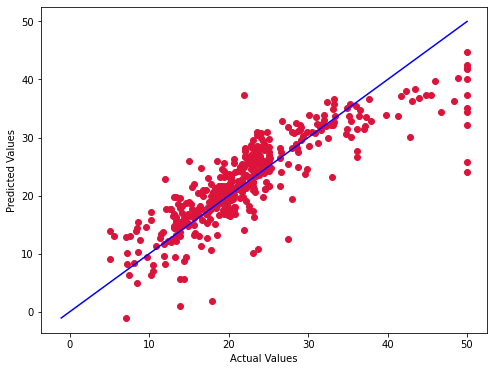

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(ytrain, predicted_value, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(predicted_value), max(ytrain))
p2 = min(min(predicted_value), min(ytrain))
plt.plot([p1, p2], [p1, p2], 'b-')

In [60]:
## Predictions on Test Data
xtest=(xtest-xtest.mean())/xtest.std()

In [61]:
xtest=xtest[selected_cols]
xtest=sm.add_constant(xtest)
xtest=xtest.drop(["TAX",24.0],axis=1)

In [63]:
predicted_value=result3.predict(xtest)

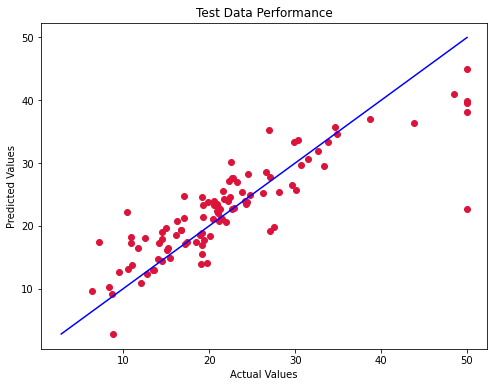

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(ytest, predicted_value, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Data Performance")
p1 = max(max(predicted_value), max(ytrain))
p2 = min(min(predicted_value), min(ytrain))
plt.plot([p1, p2], [p1, p2], 'b-')

In [66]:
from sklearn.metrics import r2_score
r2_score(ytest, predicted_value)

0.7422173332748414

In [65]:
result3.params

const      22.621040
ZN          0.944941
CHAS        0.921795
NOX        -1.914422
RM          2.812088
DIS        -2.818749
PTRATIO    -1.855294
B           0.807193
LSTAT      -3.739347
dtype: float64

In [ ]:
Y=0.944941*ZN+0.921795*CHAS-1.914422*NOX+2.812088*RM-2.818749*DIS-1.855294*PTRATIO+0.807193*B
-3.739347*LSTAT+22.621040